# arXiv data subset eda

In [1]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)

In [2]:
import pandas as pd
import numpy as np
from core.util.plot_util import *
from core.data.arxiv_data_io import *

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Pickle file can be found:
https://drive.google.com/drive/folders/1CQx3y_9vWHt9Zi9aJWp9lK0W__9T7zTY?usp=sharing

In [4]:
file_name = "tokenized_arxiv_subset_15540.pkl"
full_path = os.path.join(parent_dr, "core", "resources", file_name)
data_df = pd.read_pickle(full_path)

In [5]:
data_df.head()

,id,authors,title,categories,abstract,update_dt,clean,tokens
0,0704.0648,Kaushik Majumdar,Behavioral response to strong aversive stimuli: A neurodynamical model,q-bio.NC,"In this paper a theoretical model of functioning of a neural circuit during a\nbehavioral response has been proposed. A neural circuit can be thought of as a\ndirected multigraph whose each vertex is a neuron and each edge is a synapse.\nIt has been assumed in this paper that the behavior of such circuits is\nmanifested through the collective behavior of neurons belonging to that\ncircuit. Behavioral information of each neuron is contained in the coefficients\nof the fast Fourier transform (FFT) over the output spike train. Those\ncoefficients form a vector in a multidimensional vector space. Behavioral\ndynamics of a neuronal network in response to strong aversive stimuli has been\nstudied in a vector space in which a suitable pseudometric has been defined.\nThe neurodynamical model of network behavior has been formulated in terms of\nexisting memory, synaptic plasticity and feelings. The model has an analogy in\nclassical electrostatics, by which the notion of force and potential energy has\nbeen introduced. Since the model takes input from each neuron in a network and\nproduces a behavior as the output, it would be extremely difficult or may even\nbe impossible to implement. But with the help of the model a possible\nexplanation for an hitherto unexplained neurological observation in human brain\nhas been offered. The model is compatible with a recent model of sequential\nbehavioral dynamics. The model is based on electrophysiology, but its relevance\nto hemodynamics has been outlined.\n",2007-05-23,in this paper a theoretical model of functioning of a neural circuit during a behavioral response has been proposed a neural circuit can be thought of as a directed multigraph whose each vertex is a neuron and each edge is a synapse it has been assumed in this paper that the behavior of such circuits is manifested through the collective behavior of neurons belonging to that circuit behavioral information of each neuron is contained in the coefficients of the fast fourier transform fft over the output spike train those coefficients form a vector in a multidimensional vector space behavioral dynamics of a neuronal network in response to strong aversive stimuli has been studied in a vector space in which a suitable pseudometric has been defined the neurodynamical model of network behavior has been formulated in terms of existing memory synaptic plasticity and feelings the model has an analogy in classical electrostatics by which the notion of force and potential energy has been introduced since the model takes input from each neuron in a network and produces a behavior as the output it would be extremely difficult or may even be impossible to implement but with the help of the model a possible explanation for an hitherto unexplained neurological observation in human brain has been offered the model is compatible with a recent model of sequential behavioral dynamics the model is based on electrophysiology but its relevance to hemodynamics has been outlined,"[paper, theoretical, model, functioning, neural, circuit, behavioral, response, propose, neural, circuit, think, direct, multigraph, vertex, neuron, edge, synapse, assume, paper, behavior, circuit, manifest, collective, behavior, neuron, belong, circuit, behavioral, information, neuron, contain, coefficient, fast, fourier, transform, fft, output, spike, train, coefficient, form, vector, multidimensional, vector, space, behavioral, dynamic, neuronal, network, response, strong, aversive, stimulus, study, vector, space, suitable, pseudometric, define, neurodynamical, model, network, behavior, formulate, term, exist, memory, synaptic, plasticity, feeling, model, analogy, classical, electrostatic, notion, force, potential, energy, introduce, model, take, input, neuron, network, produce, behavior, output, extremely, d

In [6]:
cat_descriptions = []
for cat_str in data_df['categories'].unique():
    cat_list = cat_str.split(" ")
    for cat in cat_list:
        brief_desc = CATEGORY_DICT[cat] if cat in CATEGORY_DICT else "NONE FOUND"
        long_desc = CATEGORY_DESCR[cat] if cat in CATEGORY_DESCR else "NONE FOUND"
        cat_descriptions.append([cat, brief_desc, long_desc])

In [7]:
category_df = pd.DataFrame(cat_descriptions, columns=['Code', 'Category', 'Descr'])
category_df.sort_values(by=['Code'], inplace=True)
category_df

,Code,Category,Descr
1,cs.AI,Artificial Intelligence,"Covers all areas of AI except Vision, Robotics, Machine Learning,Multiagent Systems, and Computation and Language (Natural Language Processing), which have separate subject areas. In particular, includes Expert Systems, Theorem Proving (although this may overlap with Logic in Computer Science), Knowledge Representation, Planning, and Uncertainty in AI."
3,cs.CY,Computers and Society,"Covers impact of computers on society, computer ethics, information technology and public policy, legal aspects of computing, computers and education."
2,cs.DM,Discrete Mathematics,"Covers combinatorics, graph theory, applications of probability."
5,econ.TH,Theoretical Economics,"Includes theoretical contributions to Contract Theory, Decision Theory, Game Theory, General Equilibrium, Growth, Learning and Evolution, Macroeconomics, Market and Mechanism Design, and Social Choice."
6,eess.AS,Audio and Speech Processing,"Theory and methods for processing signals representing audio, speech, and language, and their applications. This includes analysis, synthesis, enhancement, transformation, classification and interpretation of such signals as well as the design, development, and evaluation of associated signal processing systems. Machine learning and pattern analysis applied to any of the above areas is also welcome."
0,q-bio.NC,Neurons and Cognition,"Synapse, cortex, neuronal dynamics, neural network, sensorimotor control, behavior, attention"
4,q-bio.TO,Tissues and Organs,"Blood flow in vessels, biomechanics of bones, electrical waves, endocrine system, tumor growth"


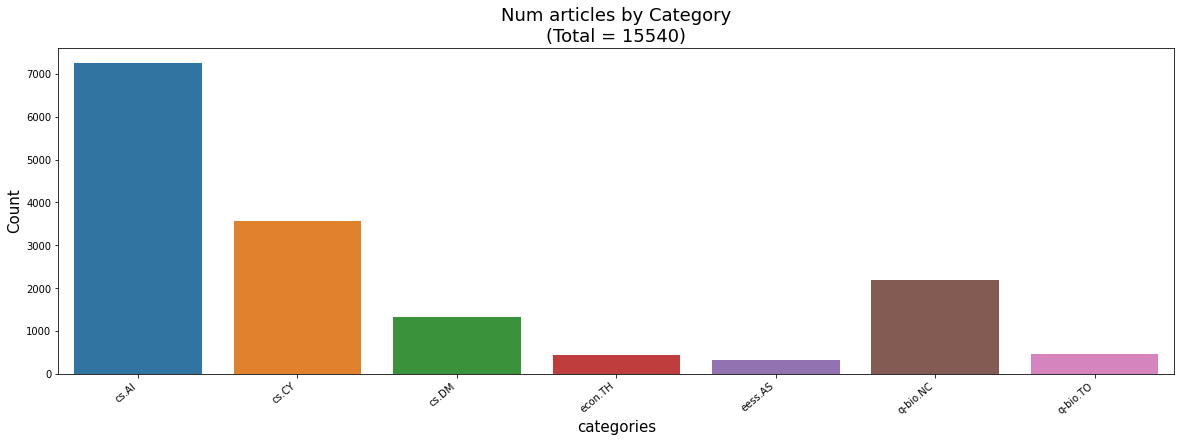

In [8]:
cat_counts = create_count_data(data_df, "categories")
create_barplot(cat_counts, "categories", "count", f"Num articles by Category\n(Total = {len(data_df)})")

## Split data

In [19]:
train_df, _ = sample_arxiv_data_by_category(data_df)
assert len(train_df)/len(data_df) == 0.8

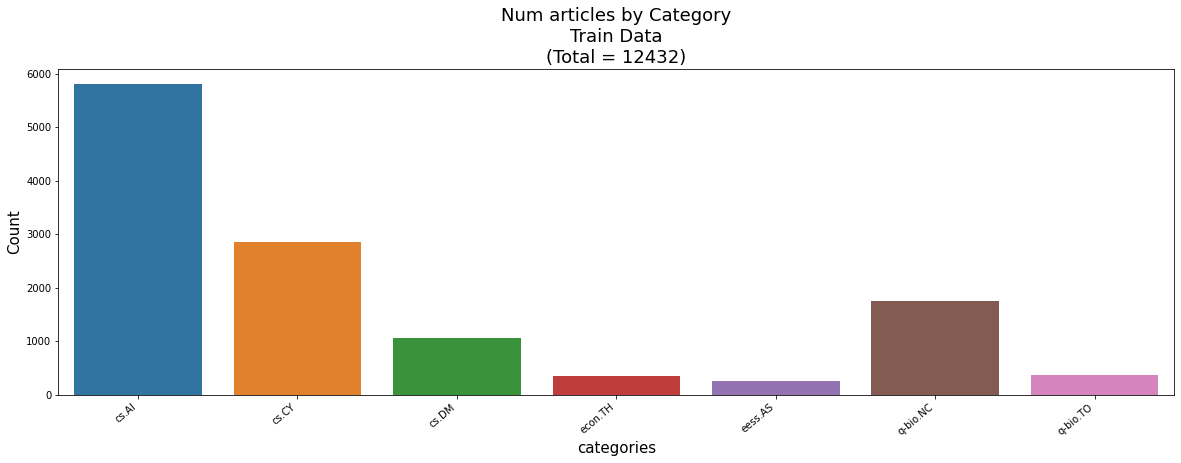

In [20]:
cat_counts_train = create_count_data(train_df, "categories")
create_barplot(cat_counts_train, "categories", "count", f"Num articles by Category\nTrain Data\n(Total = {len(train_df)})")

In [21]:
train_df.head()

,id,authors,title,categories,abstract,update_dt,clean,tokens
184,0803.0159,"V.R. Vemula, David Ball, Simon Thorne",Towards a Spreadsheet Engineering,cs.CY,"In this paper, we report some on-going focused research, but are further keen\nto set it in the context of a proposed bigger picture, as follows. There is a\ncertain depressing pattern about the attitude of industry to spreadsheet error\nresearch and a certain pattern about conferences highlighting these issues. Is\nit not high time to move on from measuring spreadsheet errors to developing an\narmoury of disciplines and controls? In short, we propose the need to\nrigorously lay the foundations of a spreadsheet engineering discipline.\nClearly, multiple research teams would be required to tackle such a big task.\nThis suggests the need for both national and international collaborative\nresearch, since any given group can only address a small segment of the whole.\nThere are already a small number of examples of such on-going international\ncollaborative research. Having established the need for a directed research\neffort, the rest of the paper then attempts to act as an exemplar in\ndemonstrating and applying this focus. With regard to one such of research, in\na recent paper, Panko (2005) stated that: ""...group development and testing\nappear to be promising areas to pursue"". Of particular interest to us are some\ngaps in the published research record on techniques to reduce errors. We\nfurther report on the topics: techniques for cross-checking, time constraints\neffects, and some aspects of developer perception.\n",2008-03-10,in this paper we report some on going focused research but are further keen to set it in the context of a proposed bigger picture as follows there is a certain depressing pattern about the attitude of industry to spreadsheet error research and a certain pattern about conferences highlighting these issues is it not high time to move on from measuring spreadsheet errors to developing an armoury of disciplines and controls in short we propose the need to rigorously lay the foundations of a spreadsheet engineering discipline clearly multiple research teams would be required to tackle such a big task this suggests the need for both national and international collaborative research since any given group can only address a small segment of the whole there are already a small number of examples of such on going international collaborative research having established the need for a directed research effort the rest of the paper then attempts to act as an exemplar in demonstrating and applying this focus with regard to one such of research in a recent paper panko number stated that group development and testing appear to be promising areas to pursue of particular interest to us are some gaps in the published research record on techniques to reduce errors we further report on the topics techniques for cross checking time constraints effects and some aspects of developer perception,"[paper, report, go, focus, research, keen, set, context, propose, big, picture, follow, certain, depressing, pattern, attitude, industry, spreadsheet, error, research, certain, pattern, conference, highlight, issue, high, time, measure, spreadsheet, error, develop, armoury, discipline, control, short, propose, need, rigorously, lay, foundation, spreadsheet, engineering, discipline, clearly, multiple, research, team, require, tackle, big, task, suggest, need, national, international, collaborative, research, give, group, address, small, segment, small, number, example, go, international, collaborative, research, have, establish, need, direct, research, effort, rest, paper, attempt, act, exemplar, demonstrate, apply, focus, regard, research, recent, paper, panko, number, state, group, development, testing, appear, promise, area, pursue, particular, interest, gap, ...]"
1417,1109.4554,Paul Bonsma,Surface Split Decompositions and Subgraph Isomorphism in Graphs on\n Surfaces,cs.DM,"Th

In [23]:
def token_count_by_category(data, category):
    token_count = {}
    category_data_set = data.loc[data['categories']==category]
    for token_list in category_data_set["tokens"]:
        for token in token_list:
            token_count[token] = token_count.get(token, 0)+1
    token_count_list = [[category, tok, count] for tok, count in token_count.items()]
    count_df = pd.DataFrame(token_count_list, columns=["Category", "Token", "Freq"])
    count_df.sort_values(by=['Freq'], inplace=True, ascending=False)
    count_df['Top'] = np.arange(count_df.shape[0]) + 1
    return count_df

In [24]:
token_count = token_count_by_category(train_df, 'cs.AI')
token_count.head(n=20)

,Category,Token,Freq,Top
19,cs.AI,model,5476,1
10,cs.AI,number,4979,2
2,cs.AI,problem,4642,3
252,cs.AI,algorithm,4045,4
292,cs.AI,base,3927,5
90,cs.AI,system,3657,6
131,cs.AI,paper,3496,7
194,cs.AI,approach,3208,8
287,cs.AI,propose,3173,9
216,cs.AI,method,2974,10


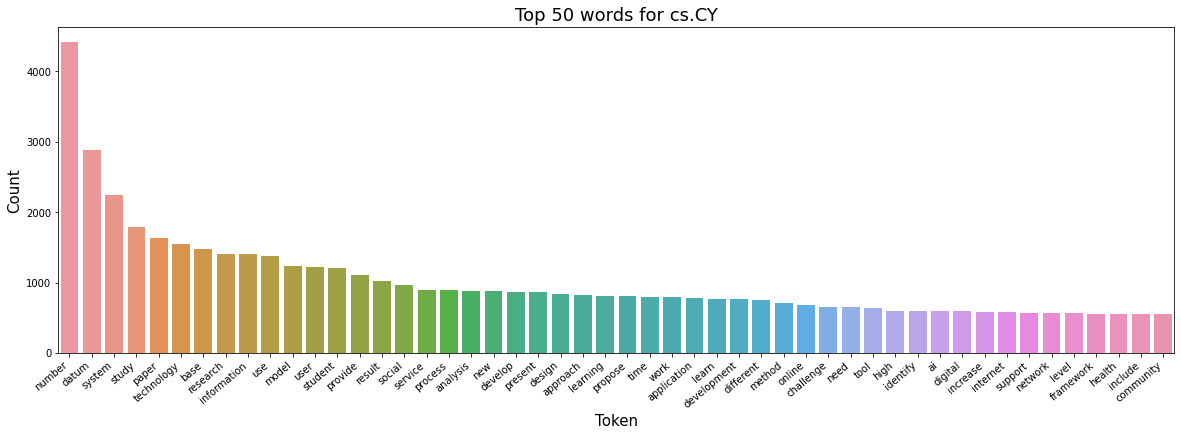

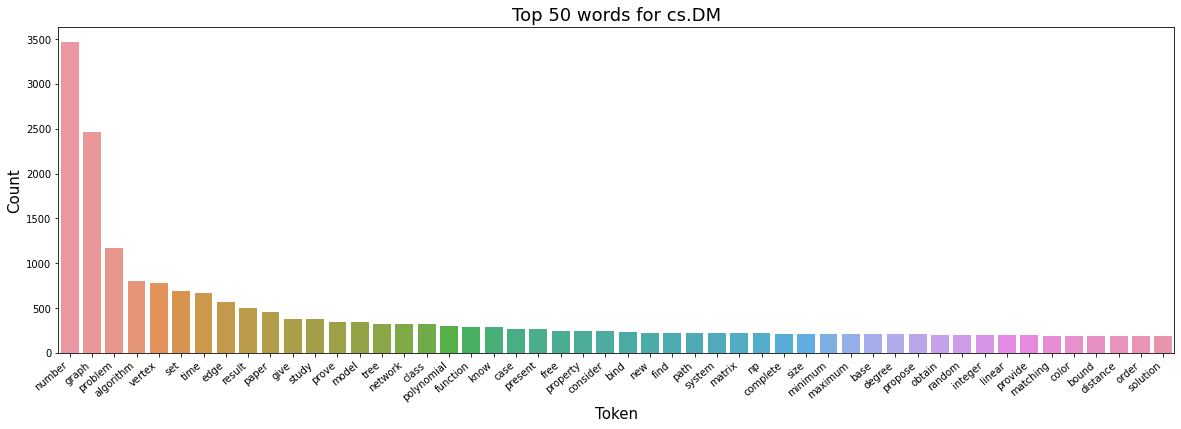

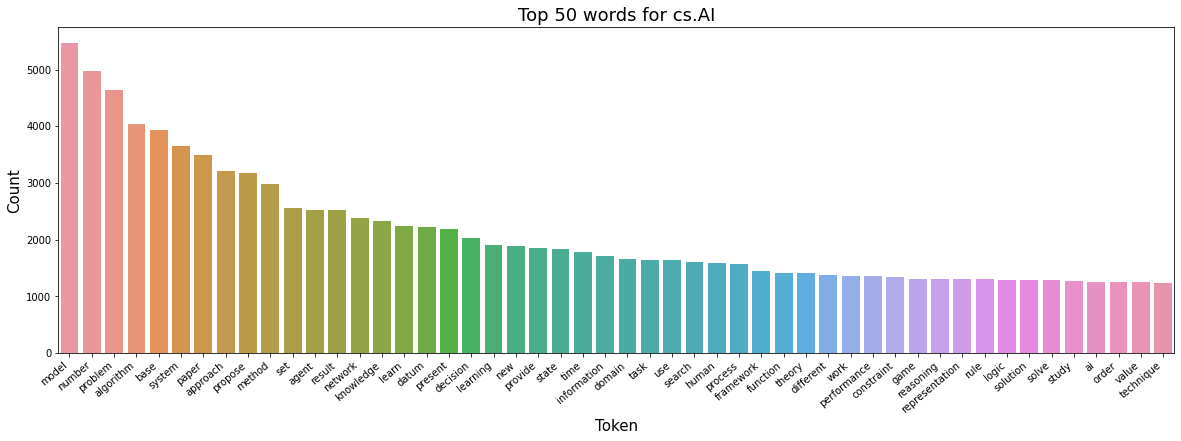

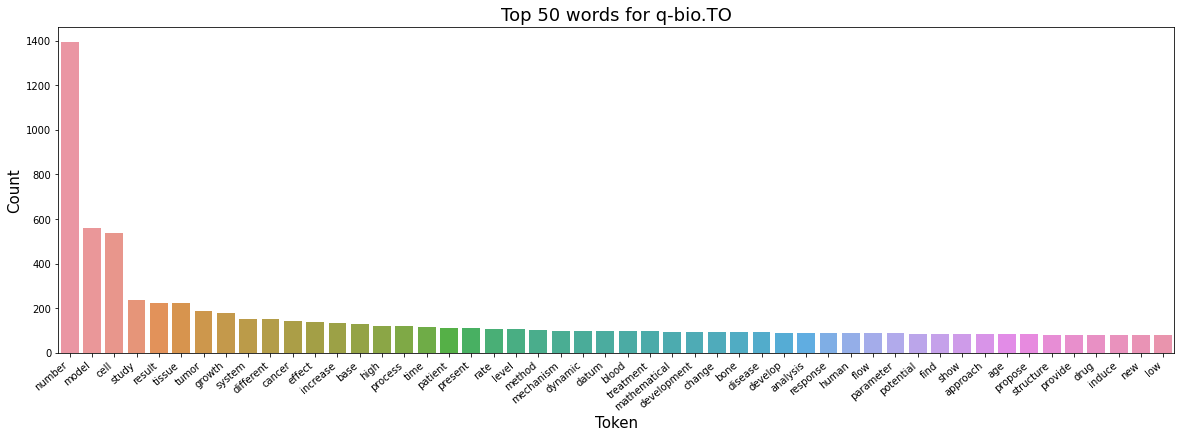

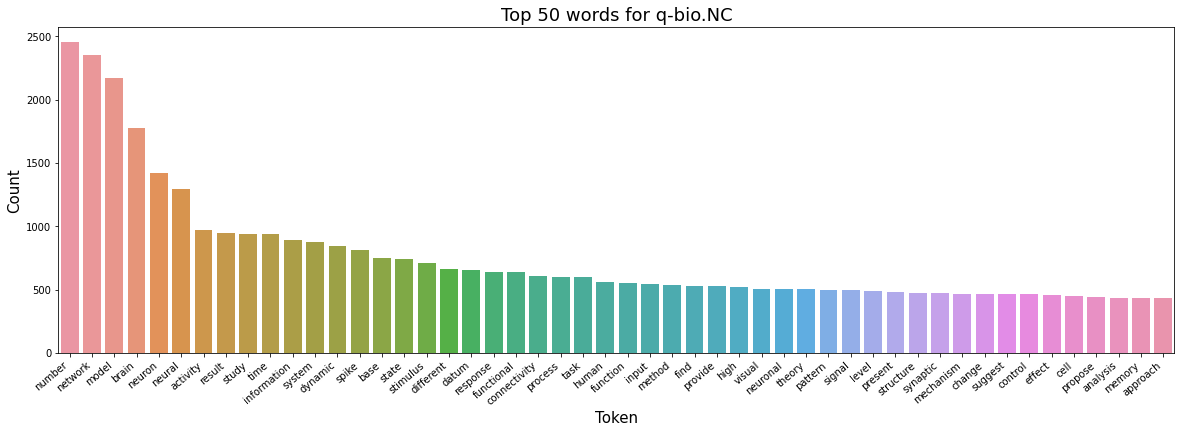

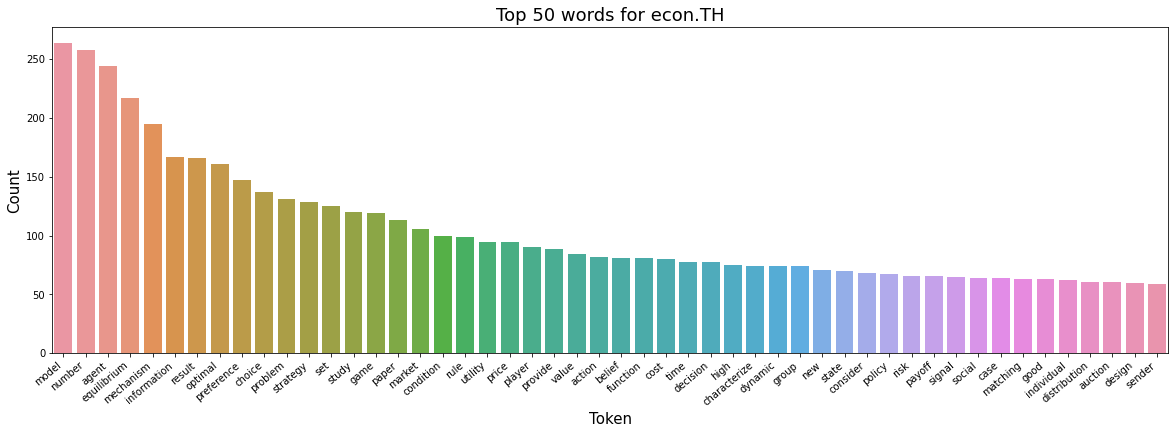

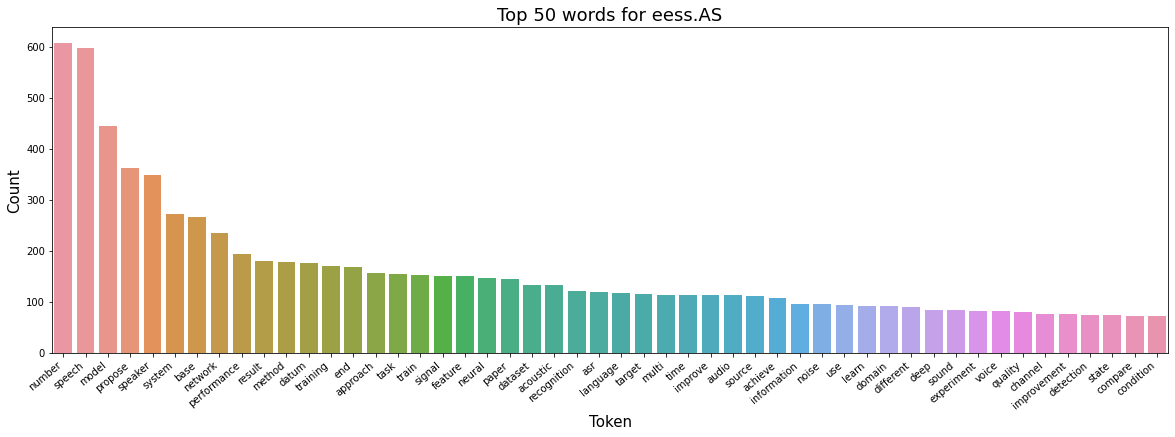

In [25]:
k = 50
for cat_str in train_df['categories'].unique():
    token_count = token_count_by_category(train_df, cat_str)
    token_count = token_count.loc[token_count["Top"] <= k]
    create_barplot(token_count, 'Token', 'Freq', f"Top {k} words for {cat_str}")